# U.S. Medical Insurance Costs

# Opening the Data

In [1]:
import csv
#This code was written without importing Numpy to test out different custom functions.

#Prepare empty data lists
whole_dataset = []
age = []
sex = []
bmi = []
num_children = []
smoker = []
region = []
charges = []

with open('insurance.csv', newline = '') as insurance_csv:
    data_reader = csv.DictReader(insurance_csv)
    for row in data_reader:
        whole_dataset.append(row)
        age.append(float(row["age"])) #Change string numbers to floating numbers
        sex.append(row["sex"])
        bmi.append(float(row["bmi"])) #Change string numbers to floating numbers
        num_children.append(float(row["children"])) #Change string numbers to floating numbers
        smoker.append(row["smoker"])
        region.append(row["region"])
        charges.append(float(row["charges"])) #Change string numbers to floating numbers


Each row in the whole_dataset is organised as an individual dictionary.
The keys are: "age", "sex", "bmi", "children", "smoker", "region", "charges".
The keys are also stored as separate lists for easier data analysis.

The key questions are:
- Find out the average age, BMI, and number of children of the patients in the dataset.
- Analyze where a majority of the individuals are from.
- Look at the different costs between smokers vs. non-smokers.
- Figure out what the average age is for someone who has at least one child in this dataset.
- Does BMI increase/decrease with age, and the number of children?


# Classes and Functions

## Class for Dividing into Groups

In [2]:
class Groups:
    def __init__(self, data):
        self.data = data   
    
    def divide_age_group(self): #Divide the data into each age group
        age_category = {"18-19": [], "20-29": [], "30-39": [], "40-49": [], "50-59": [], "60+": []}
        for item in self.data:
            age = float(item["age"])
            if age >=18 and age < 20: age_category["18-19"].append(item)
            elif age >= 20 and age < 30: age_category["20-29"].append(item)
            elif age >= 30 and age < 40: age_category["30-39"].append(item)
            elif age >= 40 and age < 50: age_category["40-49"].append(item)
            elif age >= 50 and age < 60: age_category["50-59"].append(item)
            else: age_category["60+"].append(item)
        return age_category
    
    def divide_sex_group(self): #Divide the data into each sex group
        sex_category = {"Male": [], "Female": []}
        for item in self.data:
            sex = item["sex"]
            if sex == "male": sex_category["Male"].append(item)
            else: sex_category["Female"].append(item)
        return sex_category
    
    def divide_bmi_group(self): #Divide the data into each BMI group
        bmi_groups = {"Underweight": 18.5, "Healthy": 24.9, "Overweight": 29.9, "Obese": 30}
        bmi_category = {"Underweight": [], "Healthy": [], "Overweight": [], "Obese": []}
        for item in self.data:
            bmi = float(item["bmi"])
            if bmi < bmi_groups["Underweight"]: bmi_category["Underweight"].append(item)
            elif bmi >= bmi_groups["Underweight"] and bmi < bmi_groups["Healthy"]: bmi_category["Healthy"].append(item)
            elif bmi >= bmi_groups["Healthy"] and bmi < bmi_groups["Obese"]: bmi_category["Overweight"].append(item)
            else: bmi_category["Obese"].append(item)
        return bmi_category

    def divide_children_group(self): #Divide the data into each number of children group
        children_category = {"0": [], "1": [], "2": [], "3": [], "4+": []}
        for item in self.data:
            children = item["children"]
            if children == "0": children_category["0"].append(item)
            elif children == "1": children_category["1"].append(item)
            elif children == "2": children_category["2"].append(item)                               
            elif children == "3": children_category["3"].append(item)                               
            else: children_category["4+"].append(item)                               
        return children_category

    def divide_smoker_group(self): #Divide the data into each smoker group
        smoker_category = {"Smoker": [], "Non-Smoker": []}
        for item in self.data:
            smoker = item["smoker"]
            if smoker == "yes": smoker_category["Smoker"].append(item)                              
            else: smoker_category["Non-Smoker"].append(item)                               
        return smoker_category
                                           
    def divide_region_group(self): #Divide the data into each region
        region_category = {"NorthEast": [], "NorthWest": [], "SouthEast": [], "SouthWest": []}
        for item in self.data:
            region = item["region"]
            if region == "northeast": region_category["NorthEast"].append(item)
            elif region == "northwest": region_category["NorthWest"].append(item)
            elif region == "southeast": region_category["SouthEast"].append(item)                                                             
            else: region_category["SouthWest"].append(item)                               
        return region_category
    
    def numbered_data(self): #rearrange the data to have numbers as key
        data_num = {}
        count = 1
        for item in self.data:
            data_num[count] = item
            count += 1
        return data_num
    
groups = Groups(whole_dataset)
                          

## Class for Calculating Average Values and Comparing Two Groups

In [3]:
class Average_Values:
    def __init__(self, groups):
        self.groups = groups
        self.age = groups.divide_age_group()
        self.sex = groups.divide_sex_group()
        self.bmi = groups.divide_bmi_group()
        self.num_children = groups.divide_children_group()
        self.smoker = groups.divide_smoker_group() 
        self.region = groups.divide_region_group()
        self.num_data = groups.numbered_data()
        self.group_list = [self.age, self.sex, self.bmi, self.num_children, self.smoker, self.region, self.num_data]

    def calc_average_group(self, group): 
        group_sum = 0
        for value in self.num_data.values():
            if group == "Number of Children": 
                group1 = group.replace("Number of Children", "children")
            elif group == "Insurance Cost": group1 = group.replace("Insurance Cost", "charges")
            else: group1 = group.lower()
            group_sum += float(value[group1])
        average_value = round(group_sum / len(self.num_data) , 2)
        if group == "children": group = group.replace("children", "Number of Children")
        elif group == "bmi": group = group.replace("bmi", "BMI")
        elif group == "charges": group = group.replace("charges", "Insurance Cost")
        text = "The average {group_name} in the dataset is {average_value}.".format(group_name = group.title(), average_value = average_value)
        return text
    
    def calc_average_charges(self, group):
        group1_charges = 0
        for group in self.group_list:
            if group1 in group.keys():
                value = group.get(group1)
                for index in range(0, len(value)):
                    group1_charges += float(value[index]['charges'])
                group1_average_charges = round(group1_charges / len(value) , 2)
        text = "The average insurance cost for {group_name} ${average_value}.".format(group_name = group, average_value = average_value)
        return text
     
    def calc_difference(self, group1, group2):
        group1_charges = 0
        group2_charges = 0
        for group in self.group_list:
            if group1 in group.keys():
                value = group.get(group1)
                for index in range(0, len(value)):
                    group1_charges += float(value[index]['charges'])
                group1_average_charges = round(group1_charges / len(value) , 2)
            if group2 in group.keys():
                value = group.get(group2)
                for index in range(0, len(value)):
                    group2_charges += float(value[index]['charges'])
                group2_average_charges = round(group2_charges / len(value) , 2)
        if group1_average_charges > group2_average_charges: 
            difference = group1_average_charges - group2_average_charges
            text = "The average insurance cost for {group1_name} is more expensive than {group2_name} by ${difference}.".format(group1_name = group1, group2_name = group2, difference = difference)
        elif group2_average_charges > group1_average_charges: 
            difference = group2_average_charges - group1_average_charges
            text = "The average insurance cost for {group2_name} is more expensive than {group1_name} by ${difference}.".format(group1_name = group1, group2_name = group2, difference = difference)
        else: text = "The average insurance cost for {group1_name} and {group1_name} are the same.".format(group1_name = group1, group2_name = group2)
        return text
 


## Class for Sample Distribution of Each Group

In [4]:
class Distribution:
    def __init__(self, groups):
        self.groups = groups
        self.age = groups.divide_age_group()
        self.sex = groups.divide_sex_group()
        self.bmi = groups.divide_bmi_group()
        self.num_children = groups.divide_children_group()
        self.smoker = groups.divide_smoker_group() 
        self.region = groups.divide_region_group()
        self.group_list = [self.age, self.sex, self.bmi, self.num_children, self.smoker, self.region]
      
    def count_group(self):
        age_group_count = {}
        sex_group_count = {}
        bmi_group_count = {}
        num_children_group_count = {}
        smoker_group_count = {}
        region_group_count = {}
        for group in self.group_list:
            for item in group.items():
                if group == self.age: age_group_count[item[0]] = len(item[1])
                elif group == self.sex: sex_group_count[item[0]] = len(item[1])
                elif group == self.bmi: bmi_group_count[item[0]] = len(item[1])
                elif group == self.num_children: num_children_group_count[item[0]] = len(item[1])
                elif group == self.smoker: smoker_group_count[item[0]] = len(item[1])
                elif group == self.region: region_group_count[item[0]] = len(item[1])
        self.group_count = {"Age": age_group_count, 
                       "Sex": sex_group_count, 
                       "BMI": bmi_group_count, 
                       "Number of Children": num_children_group_count,
                       "Smoker": smoker_group_count,
                       "Region": region_group_count}
        for item in self.group_count.items():
            print("The {group_name} group, in numbers, is distributed as follows: {group_value}".format(group_name = item[0], group_value = item[1]))
        return """
        """

    def calc_percentage(self, group):
        group_percentage = {}
        group_count = self.group_count[group]
        num_total_data = sum(group_count.values())
        for item in group_count.items(): 
            group_percentage[item[0]] = round((item[1] / num_total_data) * 100, 2)  
        for item in group_percentage.items():
            print("The {group_name} group is {group_value}% of the total sample population.".format(group_name = item[0], group_value = item[1]))
        max_value = max(group_percentage.values())
        max_group = list(group_percentage.keys())[list(group_percentage.values()).index(max_value)]
        return """The majority group in the sample is: {}
        """.format(max_group)

    

## Algorithm for Calculating the Average Age of Individuals with At Least One Child.

In [5]:
def avg_value_group(category, subgroup, test_value): #Can modify this function to take in Smoker and Regions groups as inputs
    average = Average_Values(groups)
    data_list = list(average.num_data.values())
    subgroup_sum = 0
    count = 0
    if subgroup == "Number of Children": subgroup = subgroup.replace("Number of Children", "children")
    elif subgroup == "Insurance Cost": subgroup = subgroup.replace("Insurance Cost", "charges")
    else: subgroup = subgroup.lower()
    if category == "Number of Children": category = category.replace("Number of Children", "children")
    elif category == "Insurance Cost": category = category.replace("Insurance Cost", "charges")
    else: category = category.lower()
    for index in range(0, len(data_list)):
        if type(data_list[index][subgroup]) == str: value = float(data_list[index][subgroup])
        if value >= test_value:
            subgroup_sum += float(data_list[index][category])
            count += 1
    average_value = round(subgroup_sum / count, 2)
    if subgroup == "children": subgroup = subgroup.replace("children", "Number of Children")
    elif subgroup == "bmi": subgroup = subgroup.replace("bmi", "BMI")
    elif subgroup == "charges": subgroup = subgroup.replace("charges", "Insurance Cost")
    if category == "children": category = category.replace("children", "Number of Children")
    elif category == "bmi": category = category.replace("bmi", "BMI")
    elif category == "charges": category = category.replace("charges", "Insurance Cost")
    text = "The average {group_name} for those with {subgroup} greater than or equal to {test_value} is {average_value}.".format(
        group_name = category.title(), 
        subgroup = subgroup.title(),
        test_value = test_value,
        average_value = average_value)
    return text


## Algorithm for Visualising the Relationship between BMI and Age, and between BMI and the Number of Children.

{'Underweight': 1.05, 'Healthy': 1.11, 'Overweight': 1.08, 'Obese': 1.09}


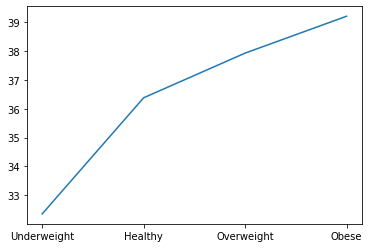

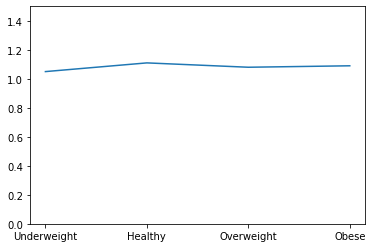

In [6]:
import matplotlib.pyplot as plt

group_data = groups.numbered_data()
bmi_group = groups.divide_bmi_group()
age_group = groups.divide_age_group()
children_group = groups.divide_children_group()

temp_data1 = {}
temp_data2 = []

for item in bmi_group.items():
    for value in item[1]:
        temp_data2.append(float(value["age"]))
    average_subgroup = round(sum(temp_data2) / len(temp_data2), 2)
    temp_data1[item[0]] = average_subgroup

plt.figure(1)
plt.plot(temp_data1.keys(), temp_data1.values())

temp_data3 = {}
temp_data4 = []
for item2 in bmi_group.items():
    for value2 in item2[1]:
        temp_data4.append(float(value2["children"]))
    average_subgroup1 = round(sum(temp_data4) / len(temp_data4), 2)
    temp_data3[item2[0]] = average_subgroup1

print(temp_data3)
plt.figure(2)
plt.ylim([0,1.5])
plt.plot(temp_data3.keys(), temp_data3.values())

# Analysis

## Average Age, BMI, Number of Children and Insurance Costs

In [7]:
average = Average_Values(groups)
print(average.calc_average_group("Age"))
print(average.calc_average_group("BMI"))
print(average.calc_average_group("Number of Children"))
print(average.calc_average_group("Insurance Cost"))  

average = Average_Values(groups)
print(average.calc_difference("Smoker", "Non-Smoker")) 

The average Age in the dataset is 39.21.
The average Bmi in the dataset is 30.66.
The average Number Of Children in the dataset is 1.09.
The average Insurance Cost in the dataset is 13270.42.
The average insurance cost for Smoker is more expensive than Non-Smoker by $23615.96.


- Find out the average age, BMI, and number of children of the patients in the dataset.

The average: 
    Age: 39.2 years old.
    BMI: 30.7
    Number of Children: 1.1
    Insurance Cost: $13270

## Cost Difference Between Smokers and Non-Smokers

Smokers pay $23616 more than Non-Smokers.

## Sample Distribution of Each Group

Note: calc_percentage function requires additional input in the form of group name ("Age", "Sex", "BMI", "Number of Children", "Smoker", "Region")

In [8]:
group_distribution = Distribution(groups)
distributions = group_distribution.count_group()
print(distributions) 
percentage = group_distribution.calc_percentage("Age")
print(percentage)
percentage = group_distribution.calc_percentage("Sex")
print(percentage)
percentage = group_distribution.calc_percentage("BMI")
print(percentage)
percentage = group_distribution.calc_percentage("Number of Children")
print(percentage)
percentage = group_distribution.calc_percentage("Smoker")
print(percentage)
percentage = group_distribution.calc_percentage("Region")
print(percentage)

The Age group, in numbers, is distributed as follows: {'18-19': 137, '20-29': 280, '30-39': 257, '40-49': 279, '50-59': 271, '60+': 114}
The Sex group, in numbers, is distributed as follows: {'Male': 676, 'Female': 662}
The BMI group, in numbers, is distributed as follows: {'Underweight': 20, 'Healthy': 222, 'Overweight': 389, 'Obese': 707}
The Number of Children group, in numbers, is distributed as follows: {'0': 574, '1': 324, '2': 240, '3': 157, '4+': 43}
The Smoker group, in numbers, is distributed as follows: {'Smoker': 274, 'Non-Smoker': 1064}
The Region group, in numbers, is distributed as follows: {'NorthEast': 324, 'NorthWest': 325, 'SouthEast': 364, 'SouthWest': 325}

        
The 18-19 group is 10.24% of the total sample population.
The 20-29 group is 20.93% of the total sample population.
The 30-39 group is 19.21% of the total sample population.
The 40-49 group is 20.85% of the total sample population.
The 50-59 group is 20.25% of the total sample population.
The 60+ group 

- Analyze where a majority of the individuals are from.
The majority of the individuals come from the following groups:
    - "20 - 29 years old"
    - Male
    - Obese
    - No Childeren
    - Non-Smoker
    - From SouthEast

## Calculating Average Values of Specific Groups That Satisfies the Set Condition

In [9]:
print(avg_value_group("age", "Number of Children", 1))
print(avg_value_group("Number of Children", "Age", 40))
print(avg_value_group("Insurance Cost", "BMI", 30))

The average Age for those with Number Of Children greater than or equal to 1 is 39.78.
The average Number Of Children for those with Age greater than or equal to 40 is 1.13.
The average Insurance Cost for those with Bmi greater than or equal to 30 is 15552.34.


The average age with those more than 1 child is  39.8 years.
The average number of children for those who are older than 40 years is 1.13.
The average insurace cost for those with BMI higher than 30 is $15552.34.